# STEP 4: Stack phase training 

At this stage, we are going to train, with Ada Boosting again, the stacked phase 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
sys.path.append('../dsbase/src/main')

In [3]:
from sklearn.model_selection import train_test_split
from ModelDSBase import ModelDSBaseWrapper
from AdaBoostClassificationDSBase import AdaBoostClassificationDSBaseModelParamsToMap
from AdaBoostClassificationDSBase import AdaBoostClassificationDSBaseModel

## Loading dataset 

In [4]:
df = pd.read_csv('datasets/train_stack_set.csv')

In [5]:
df.shape

(8149, 87)

## Training. Direct, in this case 

In [6]:
# Splitting information
df_y = df['HasDetections']
df.drop(labels=['MachineIdentifier','HasDetections','fold'], axis=1, inplace=True)

In [7]:
# to One-hot vector ...
df_oh = pd.get_dummies(df)

In [8]:
df_oh.shape

(8149, 1996)

In [13]:
# Defining the model
# Training model
params = AdaBoostClassificationDSBaseModelParamsToMap(100,1.0)
abc = ModelDSBaseWrapper('AB',df_oh.values,df_y.values,[25,50,75,85,90,100],0.3,AdaBoostClassificationDSBaseModel,params,splitter=train_test_split)

X size:(8149, 1996)
y size:(8149,)
initiating model AB0. AdaBoostClassification
initiating model AB1. AdaBoostClassification


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


initiating model AB2. AdaBoostClassification
initiating model AB3. AdaBoostClassification
initiating model AB4. AdaBoostClassification
initiating model AB5. AdaBoostClassification


In [14]:
# train
abc.train()

training model AB0. AdaBoostClassification


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training model AB1. AdaBoostClassification


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training model AB2. AdaBoostClassification


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training model AB3. AdaBoostClassification


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training model AB4. AdaBoostClassification


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training model AB5. AdaBoostClassification


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Evaluating results 

In [15]:
lcabc = abc.getLearningCurves()

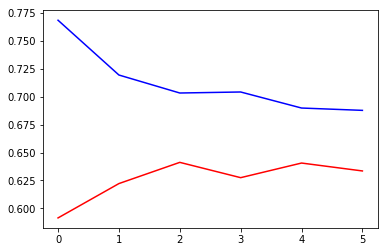

In [16]:
plt.plot(lcabc[0,:],'b',lcabc[1,:],'r')

In [17]:
score = abc.getScore()
print('Scoring: ',score)

Scoring:  0.633537832311


## Saving the model 

In [18]:
out_path = 'models/stack'

In [19]:
# Save categorical columns
columns_categorical = df.select_dtypes(include=['object']).columns
for c in columns_categorical:
    np.save(out_path + '/' + str(c) + '.sav.npy',df[c].unique())

In [20]:
abc.save(out_path)

saving model: models/stack/AdaBoostClassification_AB5.sav


# End of training!